Some exploratory data analysis and visualization.

In [2]:
import pandas as pd
import pyarrow.parquet as pq
import matplotlib.pyplot as plt
import os

# import warnings
# warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
path = 'PD-Deep/data/'
os.listdir(path)

['test.parquet',
 'metadata_test.csv',
 'train.parquet',
 'sample_submission.csv',
 'metadata_train.csv',
 '.gitkeep']

In [4]:
file_path = os.path.join(path,"train.parquet")

In [5]:
df_train = pq.read_pandas(os.path.join(path,"train.parquet")).to_pandas()

/home/tim/anaconda3/envs/tf-gpu/lib/python3.6/site-packages/pyarrow/pandas_compat.py:708: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  labels = getattr(columns, 'labels', None) or [
/home/tim/anaconda3/envs/tf-gpu/lib/python3.6/site-packages/pyarrow/pandas_compat.py:735: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  return pd.MultiIndex(levels=new_levels, labels=labels, names=columns.names)
/home/tim/anaconda3/envs/tf-gpu/lib/python3.6/site-packages/pyarrow/pandas_compat.py:752: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  labels, = index.labels


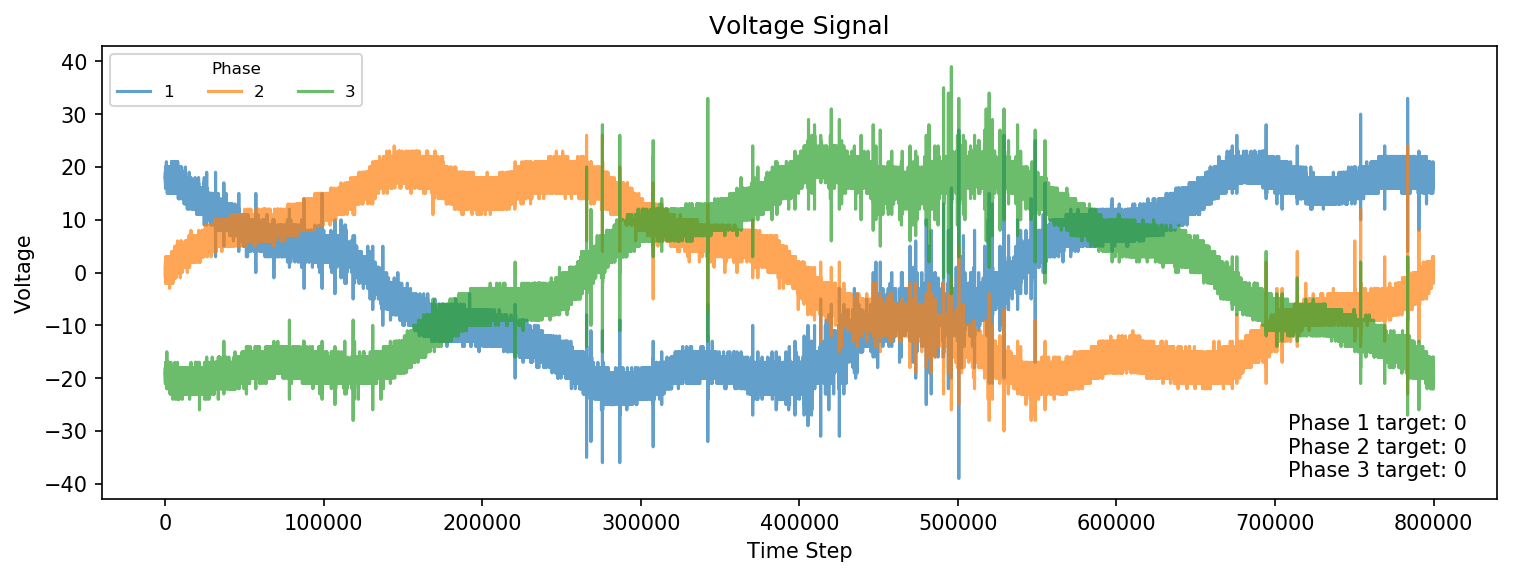

In [12]:
fig, ax = plt.subplots(figsize=(12,4), dpi=150)
ax.set(xlabel='Time Step', ylabel='Voltage',
       title='Voltage Signal')

signal_id = 0 

for i in range(3):
    plt.plot(df_train.iloc[:,((signal_id*3) + i)], alpha=0.7)


plt.legend((df_train_label['phase'].iloc[signal_id*3]+1,
            df_train_label['phase'].iloc[signal_id*3+1]+1,
            df_train_label['phase'].iloc[signal_id*3+2]+1),
           fontsize=8, 
           title='Phase', title_fontsize=8, ncol=3)

string = "Phase 1 target: {} \nPhase 2 target: {} \nPhase 3 target: {}".format(df_train_label['target'].iloc[signal_id*3],
                                                                               df_train_label['target'].iloc[signal_id*3+1],
                                                                               df_train_label['target'].iloc[signal_id*3+2])

plt.text(0.85,0.05,string, transform=ax.transAxes)
plt.show()

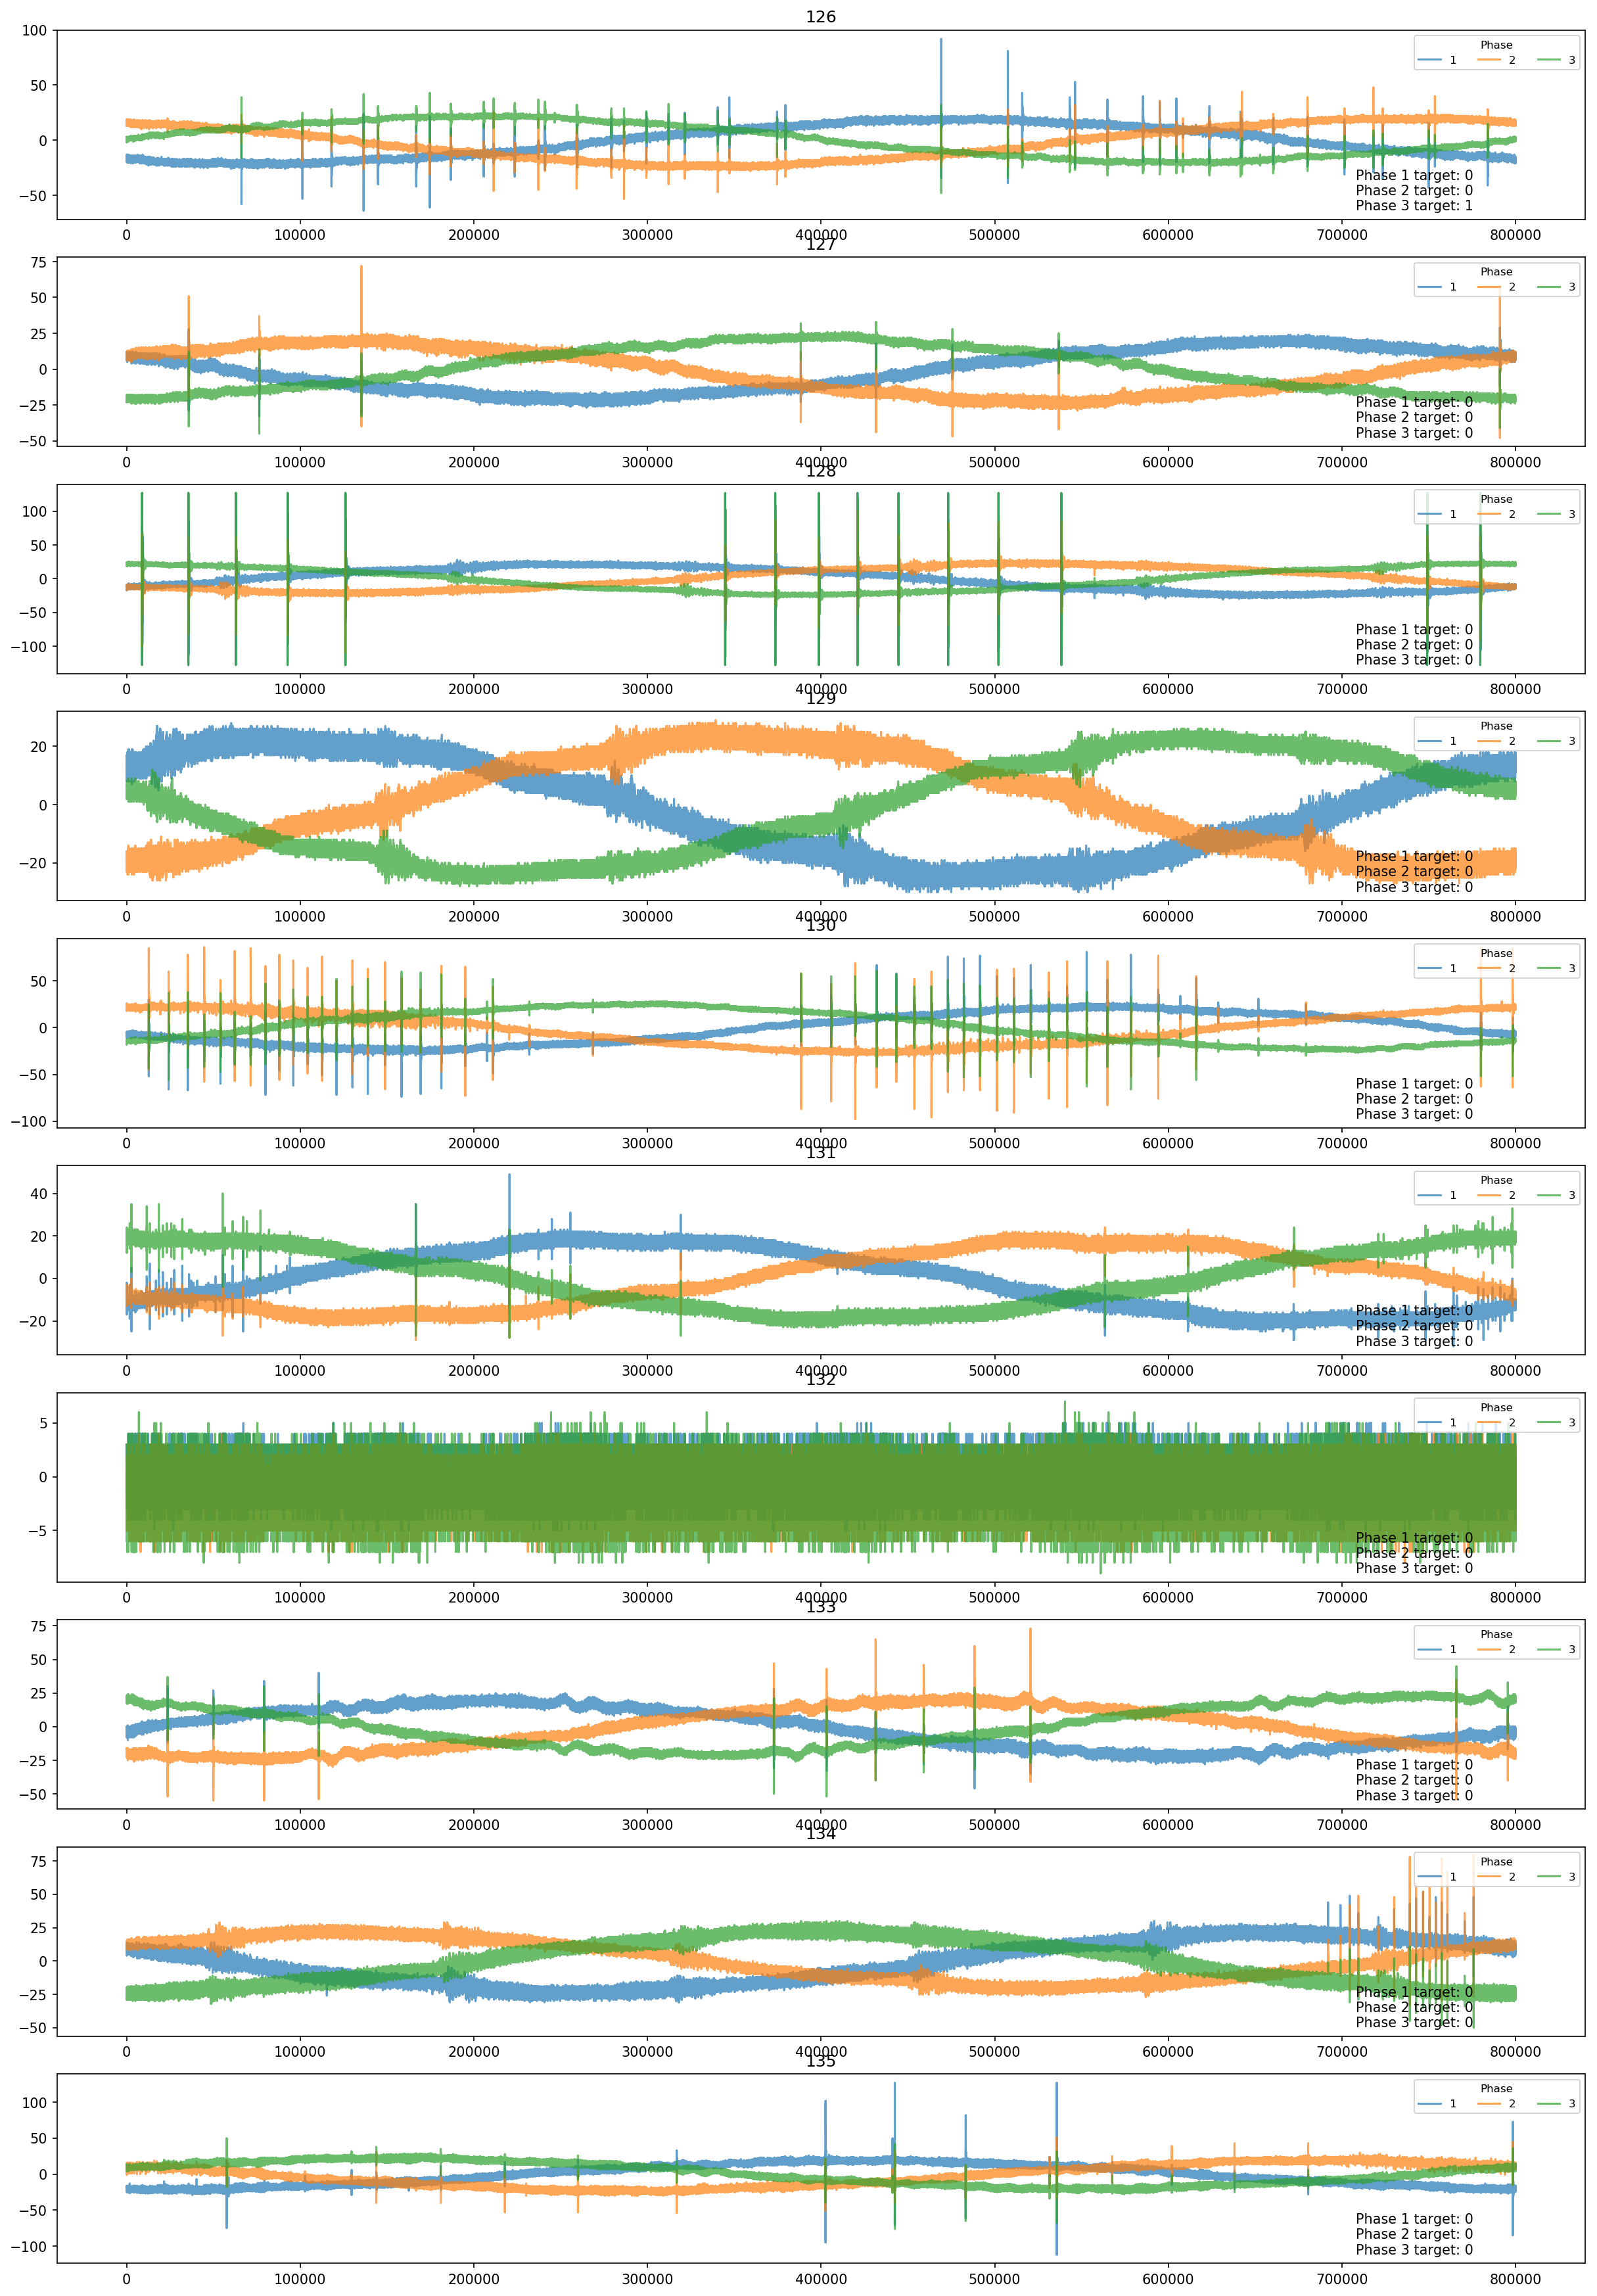

In [169]:
# No. of signal_ids to show
r = 10
fig, ax = plt.subplots(r,1,figsize=(20,30),dpi=150)
signal_id = 126

index = 0
for i in range(r):
    for t in range(3):
        ax[i].plot(df_train.iloc[:,(signal_id+i*3) + t], alpha=0.7)      
    ax[i].legend((df_train_label['phase'].iloc[signal_id+i*3]+1,
        df_train_label['phase'].iloc[signal_id+i*3+1]+1,
        df_train_label['phase'].iloc[signal_id+i*3+2]+1),
       fontsize=8, 
       title='Phase', title_fontsize=8, ncol=3, loc=1)
    ax[i].set_title(signal_id+i)
    string = "Phase 1 target: {} \nPhase 2 target: {} \nPhase 3 target: {}".format(df_train_label['target'].iloc[(signal_id+i)*3],
                                                                               df_train_label['target'].iloc[(signal_id+i)*3+1],
                                                                               df_train_label['target'].iloc[(signal_id+i)*3+2])
    ax[i].text(0.85,0.05,string,transform=ax[i].transAxes)

plt.savefig("test",dpi=150)
# plt.show()
